<h1><b> DECISION TREES

#<ul><b> LOADING THE DATASET

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount("/content/drive")
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Mounted at /content/drive


In [2]:
df=pd.read_csv("/content/drive/MyDrive/CREDIT CARD APPROVAL PROJECT/10_feature_extraction.csv")
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,EXT_SOURCE_3,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,OCCUPATION_TYPE1
0,1,0,1,1,0,202500.0,406597.5,24700.5,6,3,...,0.139376,1,0,0,0.0,0.0,0.0,0.0,1.0,8
1,0,0,0,0,0,270000.0,1293502.5,35698.5,1,2,...,0.586819,1,0,0,0.0,0.0,0.0,0.0,0.0,3
2,0,1,1,1,0,67500.0,135000.0,6750.0,6,3,...,0.729567,0,0,0,0.0,0.0,0.0,0.0,0.0,8
3,0,0,0,1,0,135000.0,312682.5,29686.5,6,3,...,0.519243,1,0,0,0.0,0.0,0.0,0.0,0.5,8
4,0,0,1,1,0,121500.0,513000.0,21865.5,6,3,...,0.581112,0,0,1,0.0,0.0,0.0,0.0,0.0,3


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix


X=df.drop("TARGET",axis=1)
y=df["TARGET"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(sampling_strategy=0.3, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [5]:
from sklearn.tree import DecisionTreeClassifier

decision_tree=DecisionTreeClassifier(random_state=42)

decision_tree.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [6]:
y_pred= decision_tree.predict(X_test)

In [7]:
y_pred1= decision_tree.predict(X_train_resampled)

In [8]:
from sklearn.metrics import classification_report

print("testing")
print(classification_report(y_pred,y_test))

testing
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     54064
           1       0.18      0.13      0.15      6726

    accuracy                           0.84     60790
   macro avg       0.54      0.53      0.53     60790
weighted avg       0.82      0.84      0.83     60790



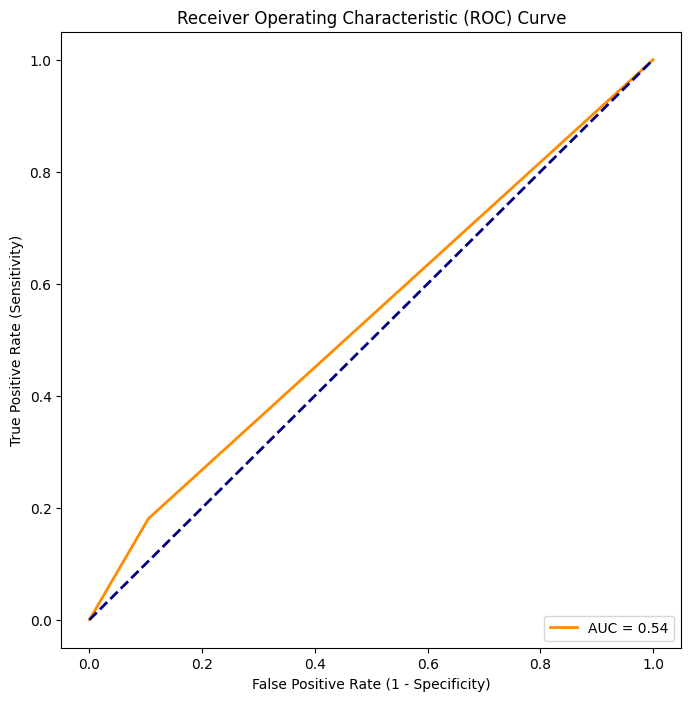

In [9]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [10]:
conf_matrix=confusion_matrix(y_test, y_pred)
conf_matrix

array([[50015,  5835],
       [ 4049,   891]])

In [11]:
TP = conf_matrix[1, 1]  # True Positives
FN = conf_matrix[1, 0]  # False Negatives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives

# Calculate Precision
precision = TP / (TP + FP)

# Calculate Negative Predictive Value (NPV)
NPV = TN / (TN + FN)

# Calculate F1 Score
f1_score = 2 * (precision * NPV) / (precision + NPV)

# Calculate Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate False Positive Rate (FPR)
FPR = FP / (FP + TN)

# Calculate False Negative Rate (FNR)
FNR = FN / (FN + TP)

TPR = TP / (TP + FN)

TNR = TN / (TN + FP)
# Display the True Positive Rate

# Display the metrics

print("True Positive Rate (TPR):", TPR)
print("True Negative Rate (TNR):", TNR)
print("Precision:", precision)
print("Negative Predictive Value (NPV):", NPV)
print("F1 Score:", f1_score)
print("Accuracy:", accuracy)
print("False Positive Rate (FPR):", FPR)
print("False Negative Rate (FNR):", FNR)

True Positive Rate (TPR): 0.18036437246963563
True Negative Rate (TNR): 0.8955237242614145
Precision: 0.13247100802854594
Negative Predictive Value (NPV): 0.9251072802604321
F1 Score: 0.23175569186261483
Accuracy: 0.8374074683336075
False Positive Rate (FPR): 0.10447627573858549
False Negative Rate (FNR): 0.8196356275303643


The model
* good for predicting non-risk users
* bad for predicting risk user
* ROC AUC of 0.53 suggests that the model is not performing well in terms of discriminating between the positive and negative classes. It's important to consider other evaluation metrics and possibly explore ways to improve the model's performance, such as tuning hyperparameters, feature engineering, or using a different algorithm.

In [22]:
clf = DecisionTreeClassifier()

# Fit the classifier on the data
clf.fit(X_train_resampled, y_train_resampled)

# Get the depth of the decision tree
tree_depth = clf.tree_.max_depth
print("Depth of the Decision Tree:", tree_depth)

Depth of the Decision Tree: 40


IMPROVING THE DECISION TREE

In [26]:
# 1 ) Pruning

decision_tree=DecisionTreeClassifier(ccp_alpha=0.05,random_state=42)
decision_tree.fit(X_train_resampled, y_train_resampled)
y_pred= decision_tree.predict(X_test)
y_pred1= decision_tree.predict(X_train_resampled)

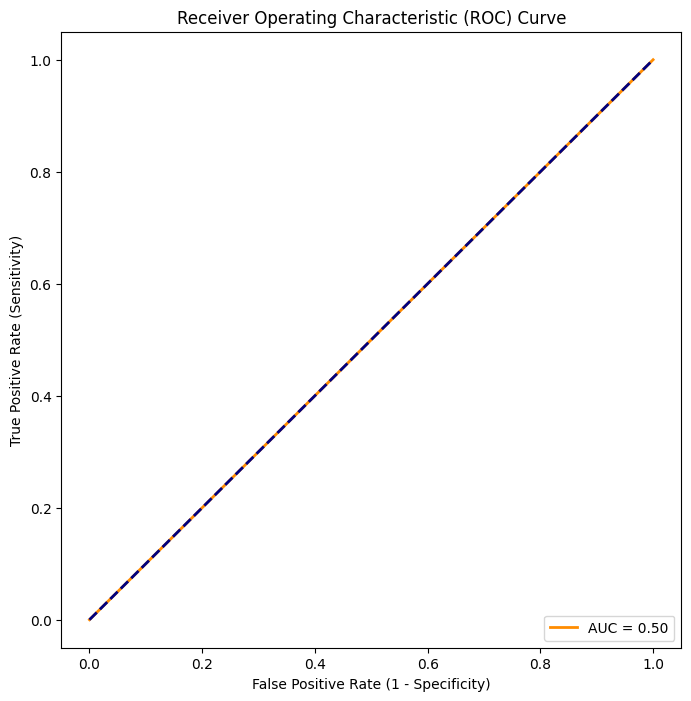

In [27]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

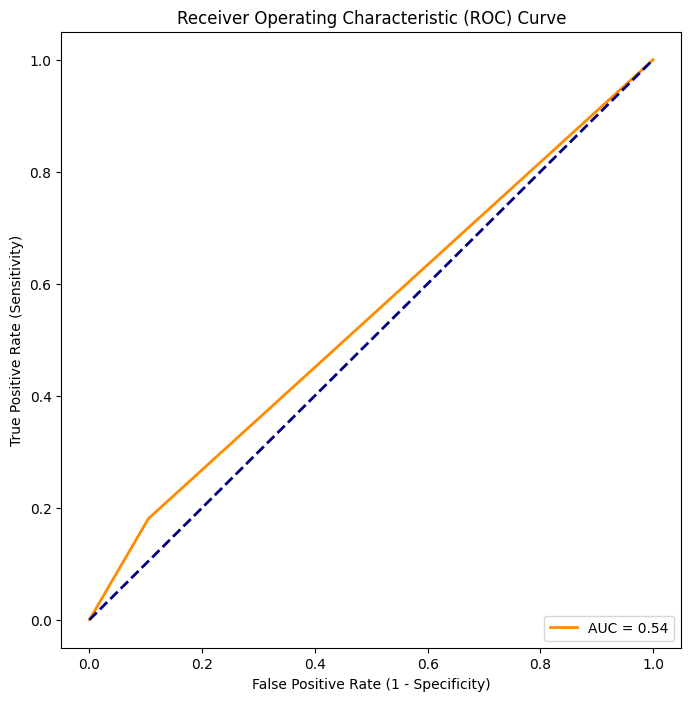

In [32]:
# limiting tree depth
decision_tree=DecisionTreeClassifier(max_depth=60,random_state=42)
decision_tree.fit(X_train_resampled, y_train_resampled)
y_pred= decision_tree.predict(X_test)
y_pred1= decision_tree.predict(X_train_resampled)

fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()